In [83]:
#Importing dependancies. In four Jupyter boxes for reasons
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

In [84]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [85]:
#Starting the data magic. This takes five boxes
engine = create_engine("sqlite:///citypop.db")
engine

Engine(sqlite:///citypop.db)

In [86]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()

['onlytable', 'onlytable2']

In [87]:
# Save references to each table
onlytable=Base.classes.onlytable2

In [88]:
session = Session(engine)
inspector=inspect(engine)

In [98]:
dataframe = pd.read_sql_query("SELECT * FROM onlytable2", engine)
print(dataframe)

dataframe_PD=pd.DataFrame.from_records(dataframe,columns=['date', 'SNOW', 'NOSNOW'])
dataframe_PD.set_index(["date"])
dataframe_PD.head()

         date Anchorage  Chicago Fort Wayne Louisville  Detroit Minneapolis  \
0  1950-01-01     11254  3620962     133607     369129  1849568      521718   
1  1960-01-01     44237  3550404     161776     390639  1670144      482872   
2  1970-01-01     48081  3369357     178269     361706  1514063      434400   
3  1980-01-01    174431  3005072     172391     298694  1203368      370951   
4  1990-01-01    226338  2783726     173072     269063  1027974      368383   
5  2000-01-01    260283  2896016     205727     256231   951270      382618   
6  2010-01-01    291826  2695598     253691     597337   713777      382578   

  New York City Cleveland      SNOW  ... Los Angeles San Diego   Miami  \
0       7891957    914808  15313003  ...     1970358    334387  249276   
1       7781984    876050  14958106  ...     2479015    573224  291688   
2       7895563    750879  14552318  ...     2811801    697027  334859   
3       7071639    573822  12870368  ...     2968579    875538  346681 

,date,SNOW,NOSNOW
0,1950-01-01,15313003,4143568
1,1960-01-01,14958106,5905934
2,1970-01-01,14552318,7259750
3,1980-01-01,12870368,8218169
4,1990-01-01,12676736,9331862


In [108]:
dataframe_PD['SNOW']=pd.to_numeric(dataframe_PD['SNOW'])
dataframe_PD['NOSNOW']=pd.to_numeric(dataframe_PD['NOSNOW'])
dataframe_PD.head()

,date,SNOW,NOSNOW
0,1950-01-01,15313003,4143568
1,1960-01-01,14958106,5905934
2,1970-01-01,14552318,7259750
3,1980-01-01,12870368,8218169
4,1990-01-01,12676736,9331862


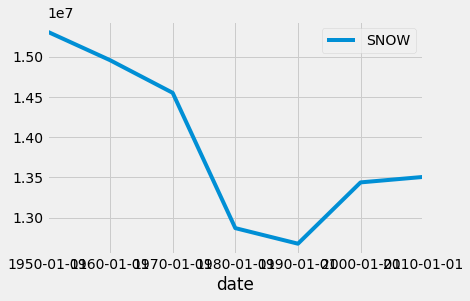

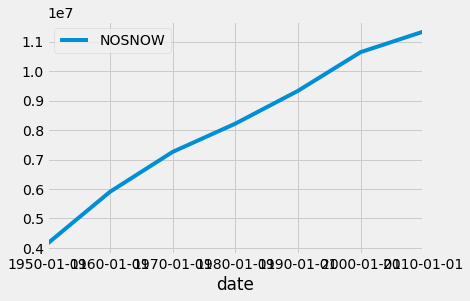

In [110]:
lines=dataframe_PD.plot.line(x='date',y='SNOW')
lines=dataframe_PD.plot.line(x='date',y='NOSNOW')
plt.savefig('precipitationplot.png')
plt.show()